In [59]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [60]:
data_5=pd.read_csv("sim_pw_05.csv")
data_5=data_5.reset_index(drop=True)
print(data_5.shape)
# data_5.head()
data_3=pd.read_csv("sim_pw_03.csv")
data_3=data_3.reset_index(drop=True)
print(data_3.shape)
# data_5.head()
data_1=pd.read_csv("sim_pw_01.csv")
data_1=data_1.reset_index(drop=True)
print(data_1.shape)
# data_5.head()

(600, 2)
(600, 2)
(600, 2)


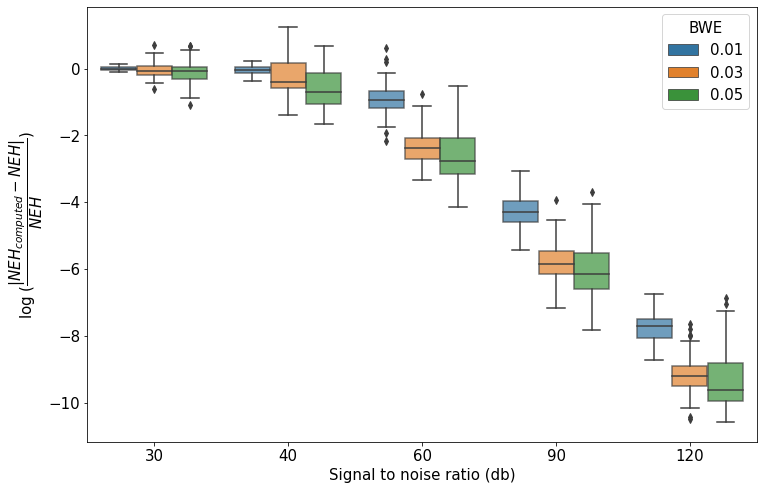

In [82]:
def prepre_data(data,pw):
    res=pd.DataFrame()
    snr=[120,90,60,40,30]#,10
    for i in range(len(snr)):
        temp=pd.DataFrame()
        temp['Error']=[math.log(x/100) for x in data.iloc[i*100:100+i*100,0]]
        temp['snr']=[snr[i]]*100
        temp['BWE']=pw
        res=pd.concat([res,temp])
    return res

plt.figure(figsize=(12,8))
plt.rc('font', size=15) 
res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')]) 
sns.boxplot(data=res,x='snr',y='Error',hue='BWE',boxprops={'alpha': 0.7})

plt.ylabel(r'log ($\dfrac { |{NEH_{computed}} -{ NEH }| } { NEH}$)')
plt.xlabel('Signal to noise ratio (db)')

plt.savefig("snr_NEH.jpeg",dpi=900,bbox_inches='tight')

In [83]:
# sns.boxplot(data=prepre_data(data_1,'1'),x='snr',y='Error',boxprops={'alpha': 0.7},hue='pw')

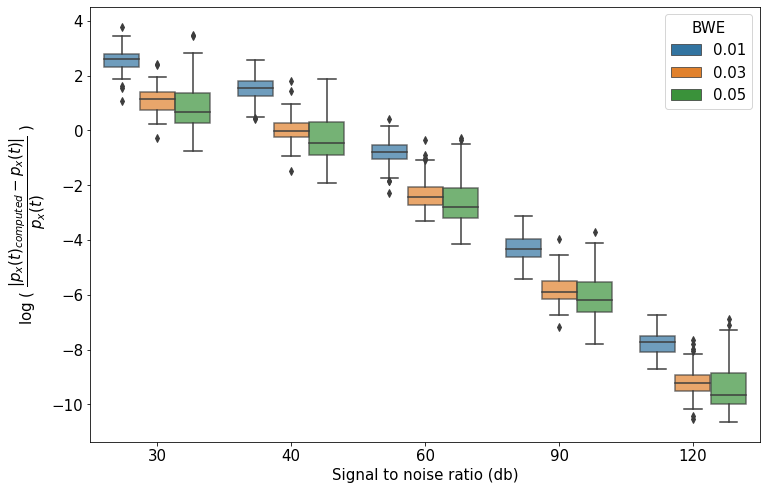

In [84]:
def prepre_data(data,pw):
    res=pd.DataFrame()
    snr=[120,90,60,40,30]#,10
    for i in range(len(snr)):
        temp=pd.DataFrame()
        temp['Error']=[math.log(x/100) for x in data.iloc[i*100:100+i*100,1]]
        temp['snr']=[snr[i]]*100
        temp['BWE']=pw
        res=pd.concat([res,temp])
    return res

plt.figure(figsize=(12,8))
plt.rc('font', size=15) 
res=pd.concat([prepre_data(data_1,'0.01'),prepre_data(data_3,'0.03'),prepre_data(data_5,'0.05')])
sns.boxplot(data=res,x='snr',y='Error',hue='BWE',boxprops={'alpha': 0.7})
# plt.ylim([0,3])
plt.ylabel(r'log ( $\dfrac { | {p_{x}(t)_{computed}} -{ p_{x}(t) } |} { p_{x}(t)}$ )')
plt.xlabel('Signal to noise ratio (db)')
plt.savefig("snr_pxt.jpeg",dpi=900,bbox_inches='tight')

In [30]:
# sns.boxplot(data=prepre_data(data_1,'1'),x='snr',y='Error',boxprops={'alpha': 0.7},hue='pw')